# 泰坦尼克号预测

## 加载相关库

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline
plt.rc('font', family='SimHei', size=13)

## 加载数据

In [2]:
data_train = pd.read_csv('./dataset/train.csv')
data_test = pd.read_csv('./dataset/test.csv')
data_train.shape, data_test.shape

((891, 12), (418, 11))

### 相关特征

|特征|含义|
|:-:|:-:|
survival|是否存活
pclass|票类
sex|性别
Age|年龄
sibsp|泰坦尼克号上兄弟姐妹/配偶的数量
parch|泰坦尼克号上父母/孩子的数量
ticket|票号
fare|票价
cabin|船舱号
embarked|出发港

## 数据分析

In [3]:
# 将训练数据和测试数据进行合并
data = pd.concat([data_train, data_test])
data.shape

(1309, 12)

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 查看数据的统计信息
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


**分析:** 由以上数据可以发现，Age最小值为小数，需要进一步排查。Sibsp和Parch的最大值为8和9，需要进一步排查。Fare的平均数为33.295479，而中位数为14.454200，说明数据严重偏右。

In [8]:
# 查看数据缺失值情况
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## 数据可视化

### 离散型数据可视化分析

In [9]:
cat_list = ['Pclass','Name','Sex','SibSp','Embarked','Parch','Ticket','Cabin']
for n,i in enumerate(cat_list):  
    Cabin_cat_num = data[i].value_counts().index.shape[0]
    print('{0}. {1}特征的类型数量是: {2}'.format(n+1,i,Cabin_cat_num))

1. Pclass特征的类型数量是: 3
2. Name特征的类型数量是: 1307
3. Sex特征的类型数量是: 2
4. SibSp特征的类型数量是: 7
5. Embarked特征的类型数量是: 3
6. Parch特征的类型数量是: 8
7. Ticket特征的类型数量是: 929
8. Cabin特征的类型数量是: 186


由以上可以发现，Pclass, Sex, SibSp, Embarked, Parch的数量相对较少,因此我们选取Pclass,Sex, SibSp, Embarked, Parch进行可视化

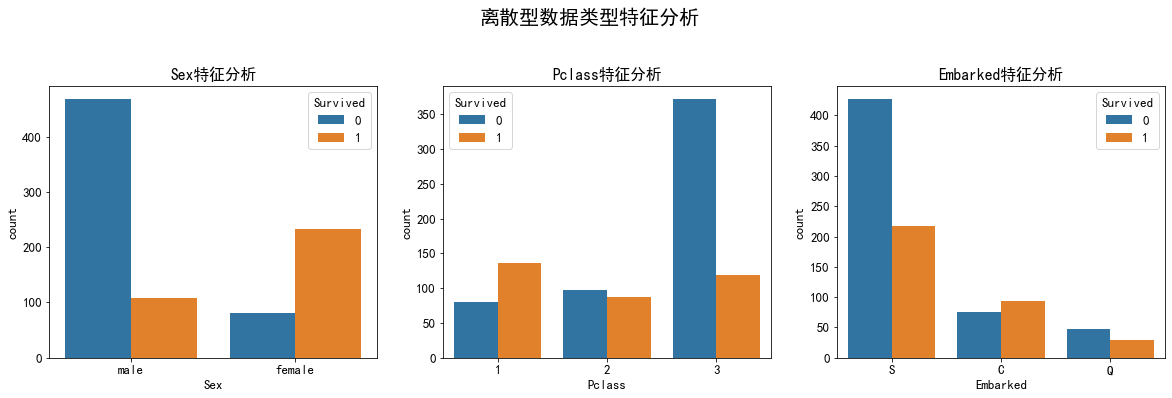

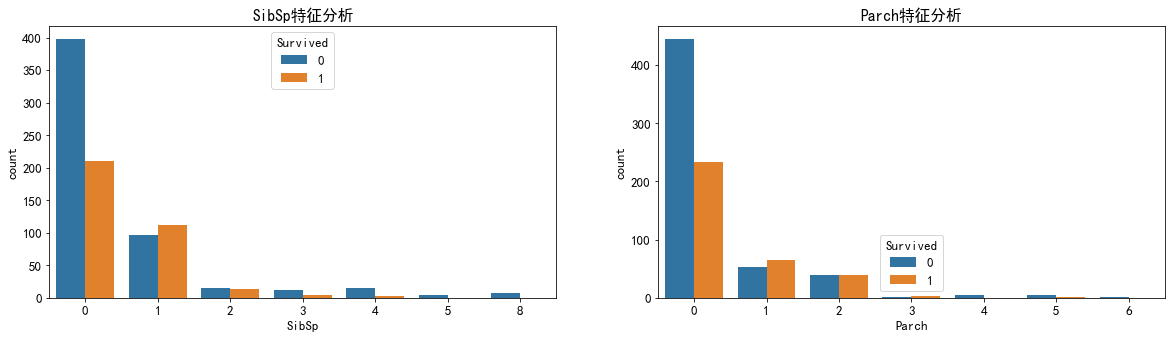

In [10]:
f, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Sex', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Pclass', hue='Survived', data=data_train, ax=ax2)
sns.countplot(x='Embarked', hue='Survived', data=data_train, ax=ax3)
ax1.set_title('Sex特征分析')
ax2.set_title('Pclass特征分析')
ax3.set_title('Embarked特征分析')
f.suptitle('离散型数据类型特征分析',size=20,y=1.1)

f, [ax1,ax2] = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='SibSp', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Parch', hue='Survived', data=data_train, ax=ax2)
ax1.set_title('SibSp特征分析')
ax2.set_title('Parch特征分析')

plt.show()

由以上图表可以发现: 与女性相比，男性的存活率明显要低得多；对于pclass来说， 类别3的人数最多但是获救率很低； 对于Embarked，S港的人数最多，但是获救率与Q港相差不大，而C港获救率最高；对于SibSp， 可以发现兄弟姐妹数为0的最多，但是获救率最低， 而有一个的获救率是最高的；对于Parch， 与SibSp的情况类似，数量为0的获救率最低，而数量为2的获救率最高，总的来看，有家人在的时候获救率要大于没有的，女性的获救率大于男性， 有钱人获救率大于普通人(票为1和2的大于3的)

#### 进一步分析性别和pclass

d:\programs\python\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\programs\python\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


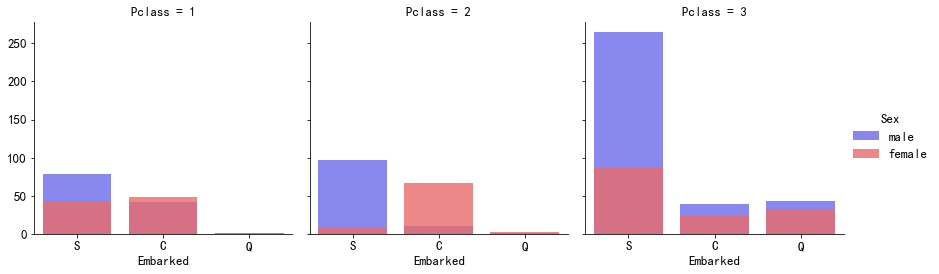

In [11]:
# 查看不同pclass下， 不同港口的男女比例
grid = sns.FacetGrid(data_train, col='Pclass', hue='Sex', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()

由以上可以看出， 大多数普通人来自港口S，这可能是导致S港存活率低的重要原因

d:\programs\python\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\programs\python\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


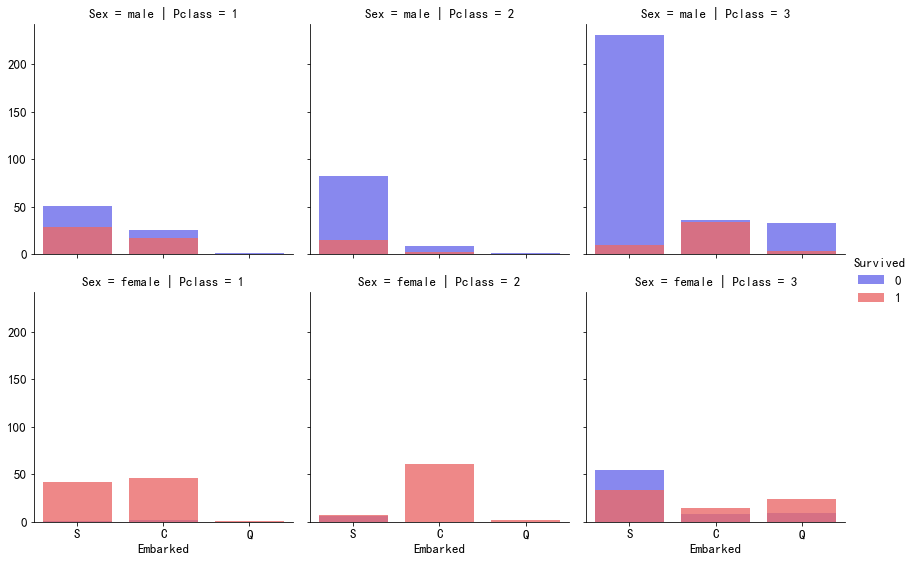

In [12]:
# 查看不同pclass下，不同性别在不同港口的存活情况
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()

由以上数据可以看出， Pclass为1的男性存活率比较高，而2和3的男性存活率， 而Pclass为1和2的所有女性都存活，为3时， S港口的女性才会有不存活的情况

### 连续型数据可视化分析

#### 对Age进行可视化分析

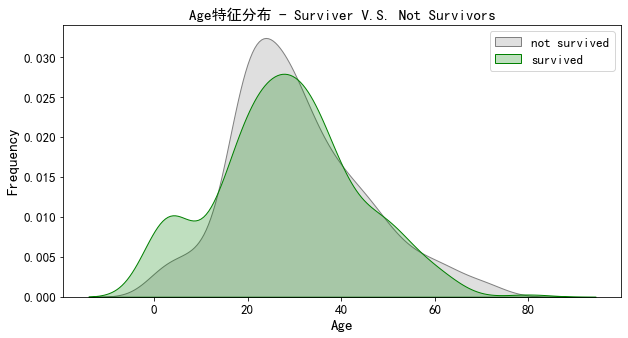

In [13]:
f,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data_train.loc[(data_train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
sns.kdeplot(data_train.loc[(data_train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age特征分布 - Surviver V.S. Not Survivors', fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()
plt.show()

可以发现，存活与不存货的差距主要在25岁以前， 其中小于15岁的获救率较高， 而15-35岁之间的较低

d:\programs\python\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()
d:\programs\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\programs\python\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


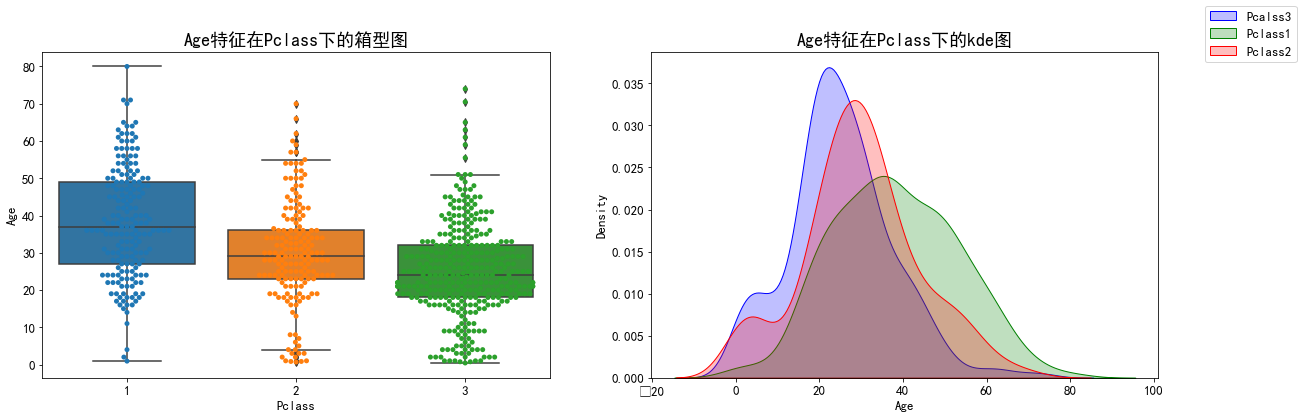

In [14]:
# 查看15岁以下的在不同pclass下的箱型图和kde
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Age", data=data_train, ax =ax1)
sns.swarmplot(x="Pclass", y="Age", data=data_train, ax =ax1)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 3),'Age'] , color='b',shade=True, label='Pcalss3',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 1),'Age'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 2),'Age'] , color='r',shade=True, label='Pclass2',ax=ax2)
ax1.set_title('Age特征在Pclass下的箱型图', fontsize = 18)
ax2.set_title("Age特征在Pclass下的kde图", fontsize = 18)
fig.legend()
fig.show()

由上图可以发现，15岁以下的孩子分布在pclass3的最多， 年龄中位数1>2>3，也就是说，越成功的人年龄一般较大，比较符合实际情况

d:\programs\python\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


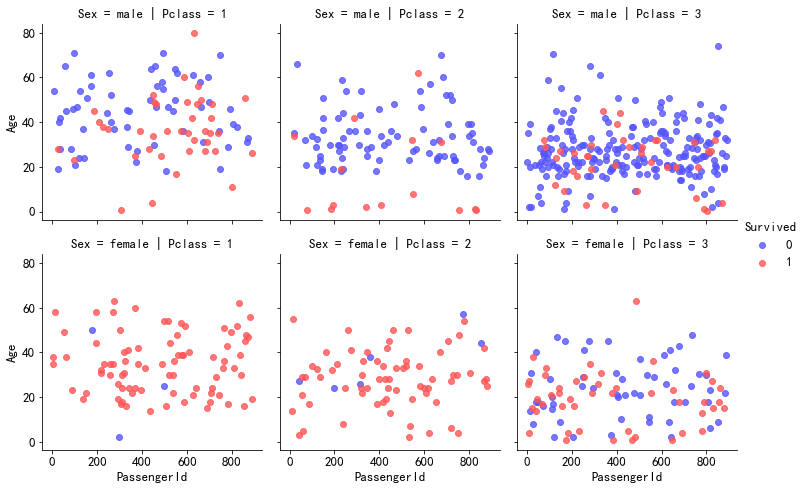

In [15]:
# Sex，Pclass分类条件下的 Age年龄对Survived的散点图
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha=0.8)
grid.add_legend()
plt.show()

由上图可以发现， Pclass为1的女性几乎都存活， 而男性存活率更高的是年龄较大的， 而对于Pclass为2的人中， 年龄比较小的男性存活率要高一些。从而也就印证了优先就妇女和孩子的情况， 其次就是成功的男性

#### 查看Fare的分布并分析

d:\programs\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\programs\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\programs\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\programs\python\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()
d:\programs\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWa

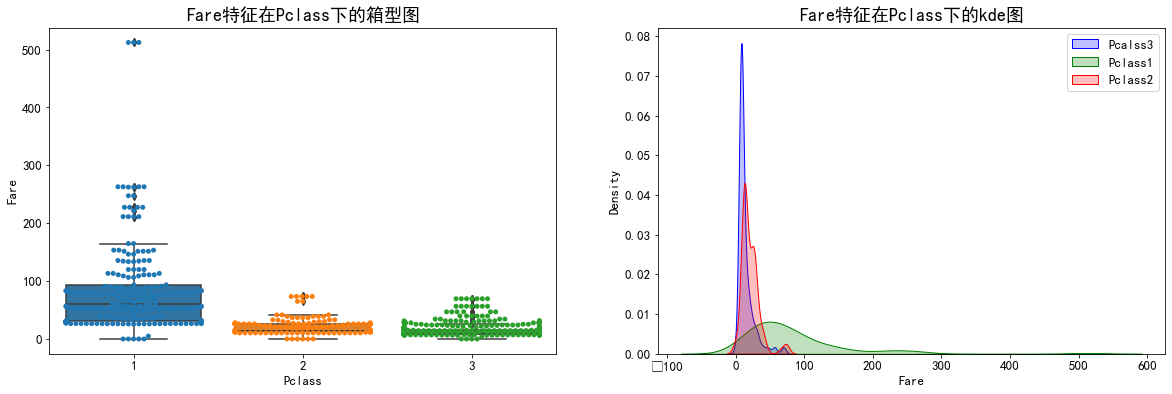

In [16]:
# 箱型图特征分析
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Fare", data=data_train, ax =ax1)
sns.swarmplot(x="Pclass", y="Fare", data=data_train, ax =ax1)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 3),'Fare'] , color='b',shade=True, label='Pcalss3',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 1),'Fare'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 2),'Fare'] , color='r',shade=True, label='Pclass2',ax=ax2)
ax1.set_title('Fare特征在Pclass下的箱型图', fontsize = 18)
ax2.set_title("Fare特征在Pclass下的kde图", fontsize = 18)
plt.legend()
fig.show()

由以上可以看出， 票价方面Pclass 1>2>3， 但是Pclass有几个大于500的异常值

In [17]:
# 查看一下异常数据
data[data.Fare>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


异常值中，有两个Cardeza，但是一个是男士 一个是女士，可能是夫妻，另外两个的其他数据的部分数据相同， 因此这个数据可能不是异常值

d:\programs\python\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


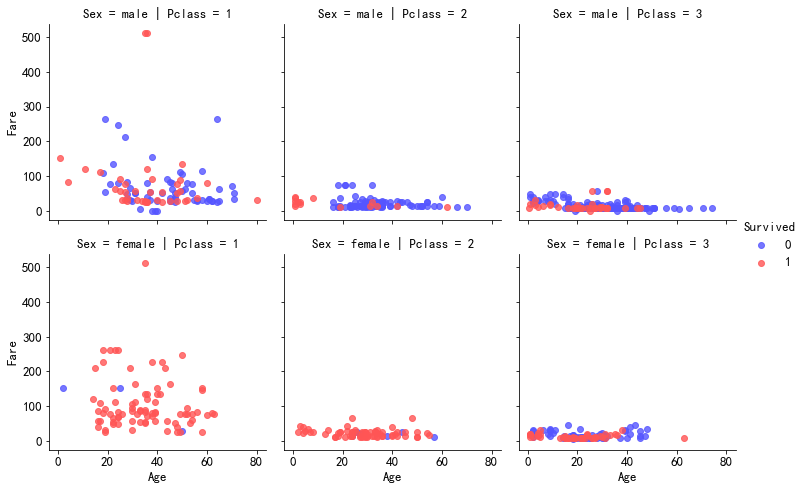

In [18]:
# Sex和Pclass情况下Fare和Age的散点图
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'Age', 'Fare', alpha=0.8)
grid.add_legend()

d:\programs\python\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


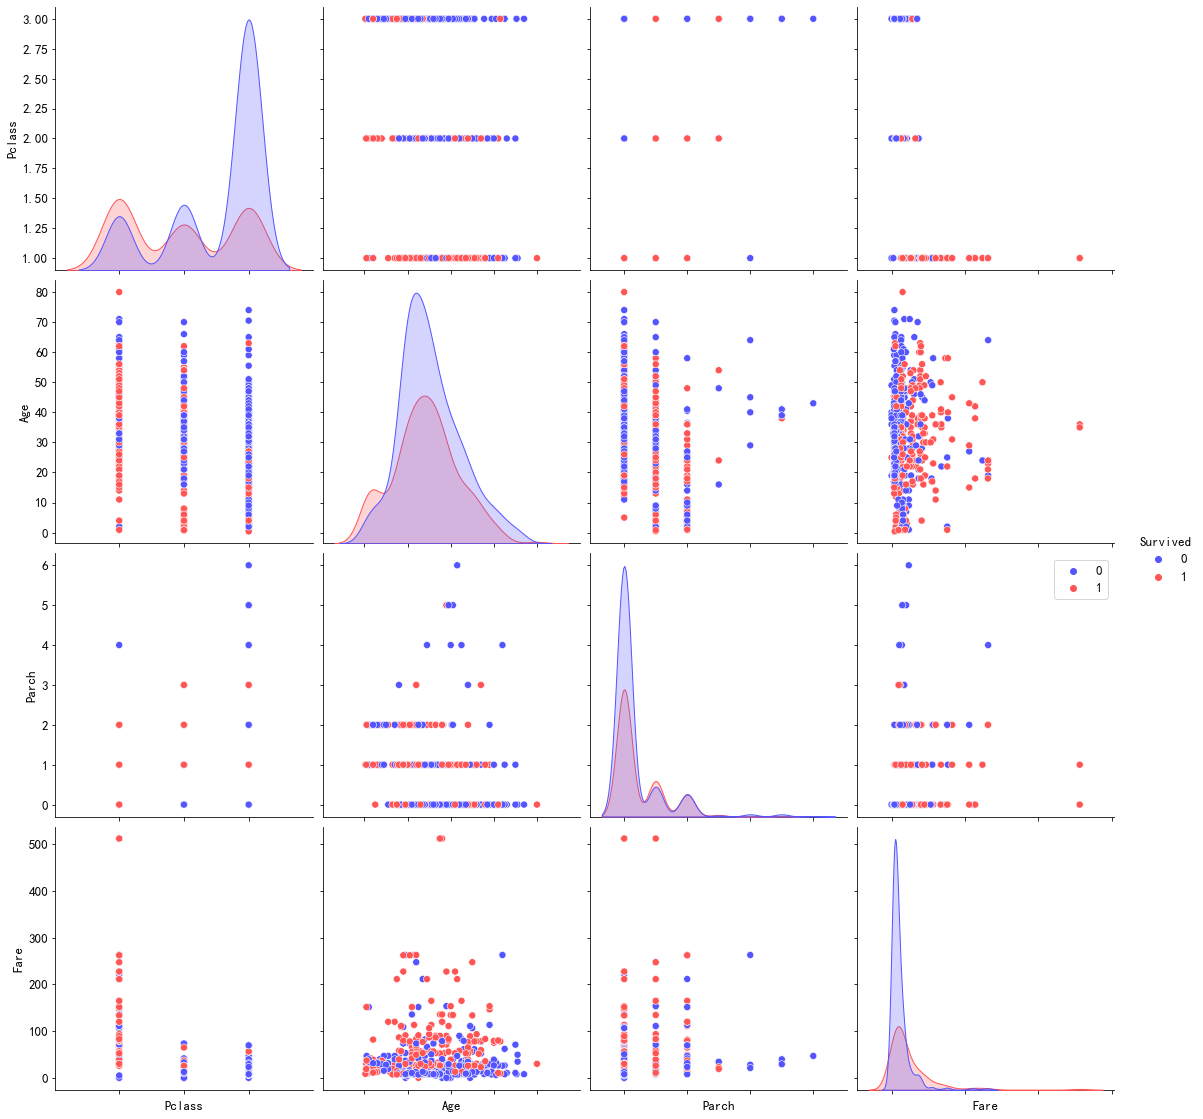

In [19]:
g = sns.pairplot(data_train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', palette = 'seismic',
                 size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
g.set(xticklabels=[])
plt.legend()

## 数据预处理

### 缺失值处理

### 处理Fare的缺失值

In [20]:
data[data.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


因为Fare的缺失数据只有一条，因此可以考虑进行删除。但是通过上方的数据分析可以发现，Fare对于存活情况是有一定影响的， 有一些是来自一个家庭的，因此我们选择对其进行填充。  
可以发现，该乘客的Pclass是3，Sex是男性，Age是60.5，因此我们可以使用与他相似的样本的平均数进行填充

In [21]:
# 查看相似乘客
data.loc[(data.Sex == 'male')&(data.Age > 60)&(data.Pclass == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
116,117,0.0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0.0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0.0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
851,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [22]:
# 使用这些相似乘客的平均数进行填充
data.Fare = data.Fare.fillna(data.loc[(data.Sex == 'male')&(data.Age > 60)&(data.Pclass == 3), 'Fare'].mean())
data[data.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 处理Embarked的缺失值

In [23]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked的缺失值一共有两个， 根据前面数据的分析，Pclass为1和2是，Q几乎没有， 而C最多，其次是S， 因此采用众数C进行填补

In [24]:
data.Embarked = data.Embarked.fillna('C')
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 处理Cabin的缺失值

In [25]:
data[data.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


可以发现，Cabin大多数都是缺失的， 因此可以删除该特征

In [26]:
data = data.drop('Cabin', axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 处理Age的缺失值

In [27]:
data[data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


可以发现有263条缺失值，如果进行删除或者特殊值填充会导致预测不准确，因此一会需要进行预测填充

## 特征工程

### 删除明显无关的特征

In [28]:
data = data.drop(['Name', 'Ticket'], axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,NaN,0,0,8.0500,S
414,1306,NaN,1,female,39.0,0,0,108.9000,C
415,1307,NaN,3,male,38.5,0,0,7.2500,S
416,1308,NaN,3,male,NaN,0,0,8.0500,S


In [29]:
survived = data.Survived
survived

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
413    NaN
414    NaN
415    NaN
416    NaN
417    NaN
Name: Survived, Length: 1309, dtype: float64

In [30]:
data_new = data.drop(['Survived'], axis=1)
data_new

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


### 对Age使用随机森林进行预测填充

#### 将离散型非数字型数据转换为数字型数据

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le_sex = LabelEncoder()
data_new.Sex = le_sex.fit_transform(data_new['Sex'])

In [33]:
le_emb = LabelEncoder()
data_new.Embarked = le_emb.fit_transform(data_new['Embarked'])

In [34]:
data_new.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [35]:
list(le_sex.classes_)

['female', 'male']

In [36]:
list(le_emb.classes_)

['C', 'Q', 'S']

In [37]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor

classers = ['Fare','Parch','Pclass','SibSp', 'Embarked', 'Sex']
etr = ExtraTreesRegressor(n_estimators=200,random_state=0)
X_train = data_new[classers][data_new['Age'].notnull()]
Y_train = data_new['Age'][data_new['Age'].notnull()]
X_test = data_new[classers][data_new['Age'].isnull()]

etr.fit(X_train,np.ravel(Y_train))
age_preds = etr.predict(X_test)
data_new['Age'][data_new['Age'].isnull()] = age_preds

d:\programs\python\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [38]:
data_new

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.014286,0,0,8.0500,2
414,1306,1,0,39.000000,0,0,108.9000,0
415,1307,3,1,38.500000,0,0,7.2500,2
416,1308,3,1,30.014286,0,0,8.0500,2


### 生成特征

**根据前面的分析，我们可以将乘客分为小孩，成年男性和成年女性**

In [39]:
def person(passenger):
    age, sex = passenger
    if (age < 18):
        return 'child'
    elif (sex == 0):
        return 'female'
    else:
        return 'male'

In [40]:
data_new['person'] = pd.DataFrame(data_new[['Age', 'Sex']].apply(person, axis=1), columns=['person'])
data_new

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person
0,1,3,1,22.000000,1,0,7.2500,2,male
1,2,1,0,38.000000,1,0,71.2833,0,female
2,3,3,0,26.000000,0,0,7.9250,2,female
3,4,1,0,35.000000,1,0,53.1000,2,female
4,5,3,1,35.000000,0,0,8.0500,2,male
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.014286,0,0,8.0500,2,male
414,1306,1,0,39.000000,0,0,108.9000,0,female
415,1307,3,1,38.500000,0,0,7.2500,2,male
416,1308,3,1,30.014286,0,0,8.0500,2,male


In [41]:
data_new = pd.concat([data_new,pd.get_dummies(data_new['person'])],axis=1)
data_new.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person,child,female,male
0,1,3,1,22.0,1,0,7.2500,2,male,0,0,1
1,2,1,0,38.0,1,0,71.2833,0,female,0,1,0
2,3,3,0,26.0,0,0,7.9250,2,female,0,1,0
3,4,1,0,35.0,1,0,53.1000,2,female,0,1,0
4,5,3,1,35.0,0,0,8.0500,2,male,0,0,1


In [42]:
data_new = data_new.drop('person', axis=1)
data_new

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child,female,male
0,1,3,1,22.000000,1,0,7.2500,2,0,0,1
1,2,1,0,38.000000,1,0,71.2833,0,0,1,0
2,3,3,0,26.000000,0,0,7.9250,2,0,1,0
3,4,1,0,35.000000,1,0,53.1000,2,0,1,0
4,5,3,1,35.000000,0,0,8.0500,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.014286,0,0,8.0500,2,0,0,1
414,1306,1,0,39.000000,0,0,108.9000,0,0,1,0
415,1307,3,1,38.500000,0,0,7.2500,2,0,0,1
416,1308,3,1,30.014286,0,0,8.0500,2,0,0,1


### 特征选择

#### 方差分析

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2

target = data_train["Survived"].values
features= ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'child', 'female', 'male']

train = data_new[0:891].copy()
test = data_new[891:].copy()

selector = SelectKBest(f_classif, k=len(features))
selector.fit(train[features], target)
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]
print("Features importance :")
for f in range(len(scores)):
    print("%0.2f %s" % (scores[indices[f]],features[indices[f]]))

Features importance :
68.85 Sex
64.17 male
57.77 female
24.60 Pclass
14.21 Fare
6.78 Embarked
2.54 child
1.83 Parch
1.69 Age
0.53 SibSp


#### 特征相关性分析

d:\programs\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\programs\python\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


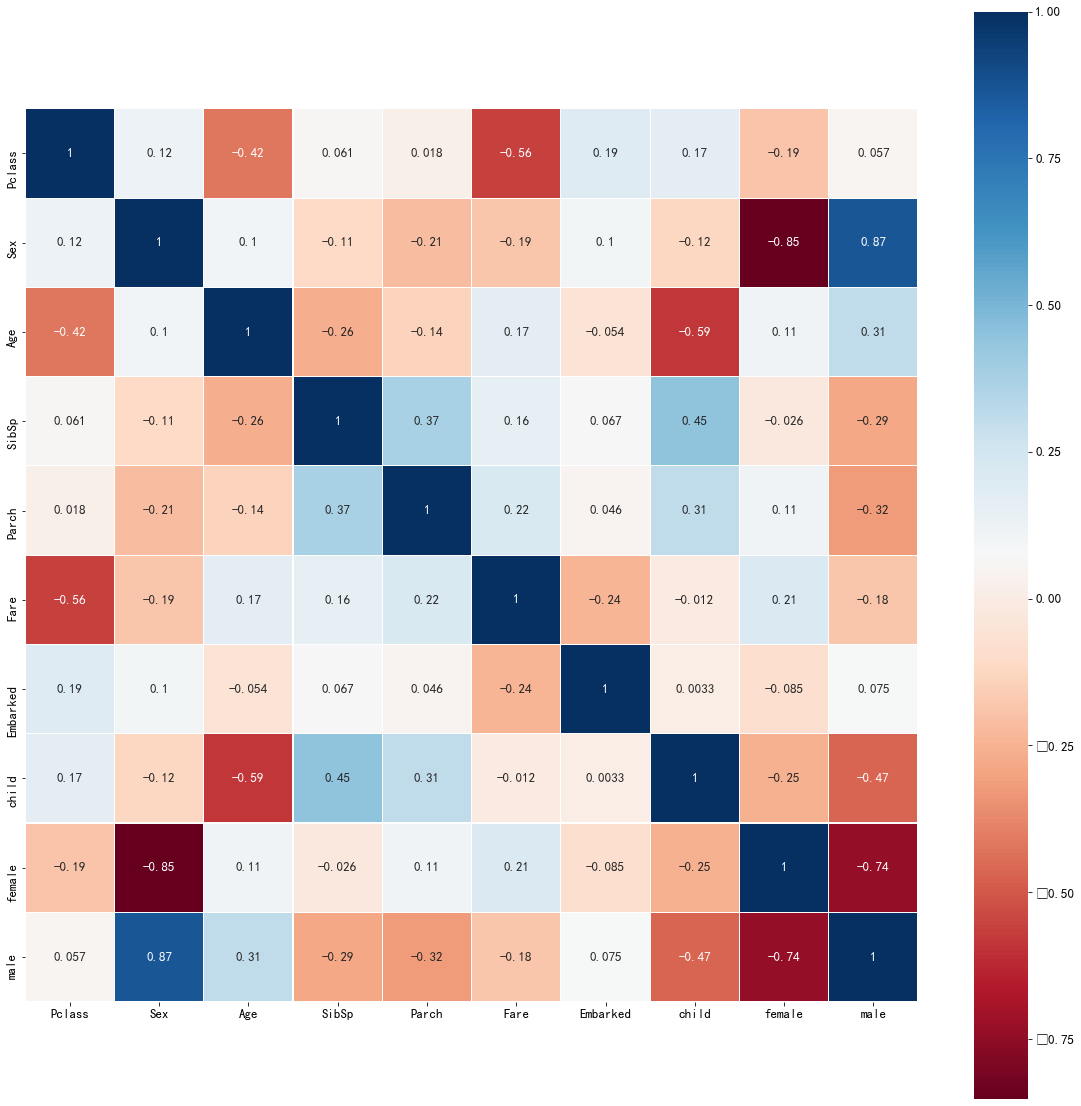

In [44]:
features_selected = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'child', 'female', 'male']
# data_corr 
df_corr = data_new[features_selected].copy()

colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df_corr.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

根据以上数据， 可以将Sex删除掉,也可以全部保留，这里选择全部保留

## 建模

这里选择随机森林进行数据的建模及预测

In [63]:
train_data = data_new[survived.notnull()]
test_data = data_new[survived.isnull()]
data_new.shape, train_data.shape, test_data.shape

((1309, 11), (891, 11), (418, 11))

In [64]:
train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child,female,male
0,1,3,1,22.0,1,0,7.2500,2,0,0,1
1,2,1,0,38.0,1,0,71.2833,0,0,1,0
2,3,3,0,26.0,0,0,7.9250,2,0,1,0
3,4,1,0,35.0,1,0,53.1000,2,0,1,0
4,5,3,1,35.0,0,0,8.0500,2,0,0,1


In [65]:
train_data = train_data.drop('PassengerId', axis=1)
submit = test_data.PassengerId
test_data = test_data.drop('PassengerId', axis=1)

In [66]:
train_y = survived[survived.notnull()]
train_y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=3000, min_samples_split=4, class_weight={0:0.745,1:0.255})
# 交叉验证，建模随机森林
kf = cross_val_score(rfc, train_data, train_y, cv=10).mean()
kf

0.8339575530586767

In [73]:
min_line = []
for i in range(1, 20):
    rfc = RandomForestClassifier(n_estimators=3000, min_samples_split=4, class_weight={0:0.745,1:0.255})
    # 交叉验证，建模随机森林
    kf = cross_val_score(rfc, train_data, train_y, cv=10).mean()
    min_line.append(kf)

In [74]:
kf

0.8317103620474408

In [68]:
rfc.fit(train_data, train_y)

RandomForestClassifier(class_weight={0: 0.745, 1: 0.255}, min_samples_split=4,
                       n_estimators=3000)

In [69]:
submit_Y = rfc.predict(test_data)
submit_Y

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [70]:
submit = pd.concat([submit, pd.DataFrame(submit_Y, columns=['Survived'], dtype='int')], axis=1)
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [71]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
submit.to_csv('./dataset/submit.csv', index=False)